In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

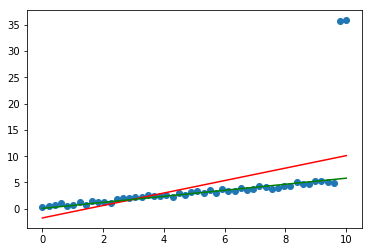

In [2]:
# Linear Regression : L2 regularization example

N = 50

X = np.linspace(0,10,N)

Y = 0.5*X + np.random.rand(N)

Y[-1] += 30
Y[-2] += 30

X = np.vstack([np.ones(N),X]).T

plt.scatter(X[:,1],Y)

w_ml = np.linalg.solve( np.dot(X.T,X) , np.dot(X.T,Y))
Yhat = np.dot(X,w_ml)

plt.plot(X[:,1],Yhat, color='red')

l2 = 1000.0

w_map = np.linalg.solve( l2*np.eye(2) + np.dot(X.T,X) , np.dot(X.T,Y) )
Yhat = np.dot(X,w_map)

plt.plot(X[:,1],Yhat, color='green')
plt.show()

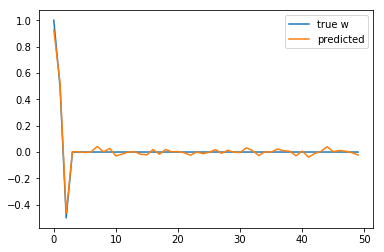

In [3]:
# Linear Regression : L1 regularization example

N = 50
D = 50

X = (np.random.random((N,D))-0.5)*10

true_w = np.array([1,0.5,-0.5]+[0]*(D-3))

Y = np.dot(X,true_w) + np.random.randn(N)*0.5

costs = []
w = np.random.randn(D)/np.sqrt(D)

lr = 0.001
l1 = 10

for t in range(500):
    Yhat = np.dot(X,w)
    delta = Yhat - Y
    w = w - lr*(X.T.dot(delta) + l1*np.sign(w))
    mse = np.dot(delta,delta)/N
    costs.append(mse)
    
# plt.plot(costs)

plt.plot(true_w, label = 'true w')
plt.plot(w, label = 'predicted')

plt.legend()

plt.show()

In [29]:
#### LOGISTIC REGRESSION

In [4]:
N = 100
D = 2

X = np.random.randn(N,D+1)
X[:,2] = 1

w = np.random.rand(D+1)

z = np.dot(X,w)

def sigmoid(x):
    return ( 1/(1+np.exp(-x)))

print(sigmoid(z))
print(z.shape)

[ 0.49763454  0.26987383  0.8075609   0.83711628  0.87785486  0.89226596
  0.74701936  0.22227479  0.94629768  0.35331561  0.55667152  0.64474233
  0.8774317   0.42459044  0.62836539  0.58561697  0.42523709  0.28547716
  0.90155332  0.21687016  0.47454279  0.85259239  0.74033905  0.86568928
  0.25185736  0.55699121  0.08585332  0.74486768  0.97636608  0.47276186
  0.17782584  0.9297243   0.71606645  0.49845121  0.38537975  0.17834193
  0.54432847  0.55629771  0.9887086   0.61820097  0.69788524  0.68379731
  0.66555367  0.39507513  0.07814547  0.87792454  0.86262691  0.60851033
  0.43224466  0.82960705  0.76863608  0.65940063  0.59898844  0.90356331
  0.32458009  0.9426049   0.11788097  0.46114949  0.73321465  0.83828433
  0.27895716  0.9095374   0.76206194  0.66644028  0.94439741  0.5597313
  0.41474494  0.70243403  0.79985124  0.51594301  0.93055003  0.43532261
  0.46130975  0.54523926  0.23310487  0.8131405   0.91959611  0.85011076
  0.9115291   0.16396865  0.42757944  0.53724405  0.

In [5]:
# ecommerce project

def get_data():
    df = pd.read_csv('F:\\DATA SCIENCE\\Udemy\\Deep Learning Prerequisites\\machine_learning_examples-master\\ann_logistic_extra\\ecommerce_data.csv')
    df_mat = df.as_matrix()
    X = df_mat[:,:-1]
    Y = df_mat[:,-1]
    
    # Preprocess - normalize
    X[:,1] = ( X[:,1] - np.mean(X[:,1]) )/np.std(X[:,1])
    X[:,2] = ( X[:,2] - np.mean(X[:,2]) )/np.std(X[:,2])
    
    N,D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for x in range(N):
        t = int(X[x,D-1])
        X2[x,t+D-1] = 1
        
    return X2,Y

def get_binary_data():
    X,Y = get_data()
    X2 = X[Y<=1]
    Y2 = Y[Y<=1]
    
    return X2,Y2


In [6]:

X,Y = get_binary_data()

D = X.shape[1]
W = np.random.randn(D)
b = 0

def forward(X,W,b):
    return sigmoid( np.dot(X,W) + b )

P_Y_given_X = forward(X,W,b)
predictions = np.round(P_Y_given_X)

def classification_rate(Y,pred):
    return np.mean(Y == pred)

classification_rate(Y,predictions)

0.314070351758794

In [7]:
N = 100
D = 2

X = np.random.randn(N,D)

X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

T = np.array([0]*50 + [1]*50)
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones,X), axis=1)

w = np.random.randn(D+1)
z = np.dot(Xb,w)

def sigmoid(a):
    return 1/(1+np.exp(-a))

Y = sigmoid(z)

def cross_entropy(t,y):
    s = 0
    for i in range(N):
        if t[i] == 1:
            s -= np.log(y[i])
        else:
            s -= np.log(1-y[i])
            
    return s

cross_entropy(T,Y)

13.085320317964397

0 45.4729315522 60.0547285278
500 20.5130257956 24.099421554
1000 20.0429852982 23.1193567514
1500 19.9815490469 22.7997049562
2000 20.0322250261 22.7104324224
2500 20.0946967769 22.6961568903
3000 20.1452982688 22.7035243589
3500 20.1819500956 22.7149804106
4000 20.2073922892 22.7252490689
4500 20.2247266355 22.7331873768
5000 20.2364326027 22.7389461736
5500 20.2443026424 22.742989829
6000 20.2495815329 22.7457774679
6500 20.2531180145 22.747678277
7000 20.2554856054 22.7489656199
7500 20.2570700564 22.7498337429
8000 20.2581301866 22.7504175414
8500 20.258839417 22.7508094263
9000 20.2593138618 22.7510721729
9500 20.2596312324 22.7512481978
Classification Rate - Train : 0.96644295302
Classification Rate - Test : 0.95


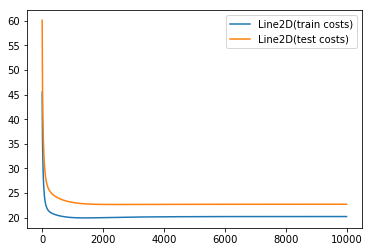

In [25]:
from sklearn.utils import shuffle

X,Y = get_binary_data()
X,Y = shuffle(X,Y)

Xtrain = X[:-100]
Ytrain = Y[:-100]

Xtest = X[-100:]
Ytest = Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b = 0

def forward(X,W,b):
    return sigmoid(np.dot(X,W)+b)

train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pyTrain = forward(Xtrain,W,b)
    pyTest = forward(Xtest,W,b)
    
    ctrain = cross_entropy(Ytrain,pyTrain)
    ctest = cross_entropy(Ytest,pyTest)
    
    train_costs += [ctrain]
    test_costs += [ctest]
    
    W -= learning_rate*np.dot(Xtrain.T, pyTrain - Ytrain)
    b -= learning_rate*np.dot(Xtrain.T, pyTrain - Ytrain).sum()
    
    if i%500 == 0:
        print(i, ctrain, ctest)
        
print ("Classification Rate - Train : " + str(classification_rate(Ytrain, np.round(pyTrain))))
print ("Classification Rate - Test : " + str(classification_rate(Ytest, np.round(pyTest))))

# plot the cost
legend1, = plt.plot(train_costs, label = 'train costs')
legend2, = plt.plot(test_costs, label = 'test costs')

plt.legend([legend1, legend2])
plt.show()